In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [16]:
class AI_Basic:

    def __init__(self):
        pass

    def ai_continue(self):
        raise ImplementationError("Must be implemented in subclass")

    def ai_roll(self):
        return random.choice([1, 2, 3, 4, 5, 6])
    
    def ai_turn(self): # rolls once and returns score
        turn_score = 0
        roll_result = self.ai_roll()
        if roll_result == 1:
            turn_score = 0
        else:
            turn_score = roll_result
        return turn_score
        
        
class AI_Random(AI_Basic): 
    
    def ai_continue(self):
        cont = random.randint(0,1)
        if cont == 1:
            return True
        else:
            return False
    
    def ai_turn(self): # randomly chooses to hold or roll again
        turn_score = 0
        ai_will_roll = True
        count = 0
        while ai_will_roll == True:
            if count == 0:
                roll_result = self.ai_roll()
                if roll_result == 1:
                    turn_score = 0
                    ai_will_roll = False
                    count = 1
                else:
                    turn_score += roll_result
                    count = 1
            else:
                if self.ai_continue() == True:
                    roll_result = self.ai_roll()
                    if roll_result == 1:
                        turn_score = 0
                        ai_will_roll = False
                    else:
                        turn_score += roll_result
                else:
                    ai_will_roll = False
        return turn_score


class Game:

    def __init__(self, player1, player2, rounds=7):
        self.player1 = player1
        self.player2 = player2
        self.rounds = rounds

    def update_player_scores(self, round_scores): #tracks the current score of players
        self.p1_score += round_scores[0]
        self.p2_score += round_scores[1]

    def game_round(self): #plays a round and returns score for each player
        player1_round_score = self.player1.ai_turn()
        player2_round_score = self.player2.ai_turn()
        round_scores = [player1_round_score, player2_round_score]
        return round_scores

    def game_play(self):
        current_round = 1
        p1_score = 0
        p2_score = 0
        while current_round <= self.rounds:
            round_scores = self.game_round()
            p1_score += round_scores[0]
            p2_score += round_scores[1]
            current_round += 1
        final_score = [p1_score, p2_score]
        if p1_score > p2_score:
            return 1
        elif p1_score < p2_score:
            return 2
        elif p1_score == p2_score:
            return 3


In [17]:
def pig_trials(trials=10):
    pig_results = []
    for trial in range(trials):
        pig_results.append(game.game_play())
    return pig_results

In [43]:
ai_base = AI_Basic()
ai_random = AI_Random()
game = Game(ai_base, ai_random)

In [84]:
pt_onehundred = pig_trials(100)

In [86]:
def pig_final_result(win_list):
    p1_wins = 0
    p2_wins = 0
    ties = 0
    for win in win_list:
        if win == 1:
            p1_wins += 1
        elif win == 2:
            p2_wins += 1
        else:
            ties += 1
    return [p1_wins, p2_wins, ties]

In [90]:
trial_results = pig_final_result(pt_onehundred)

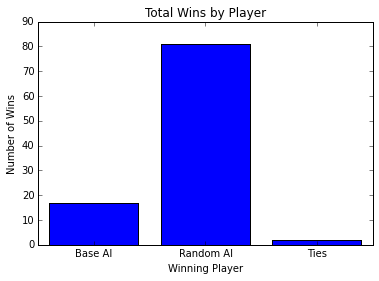

In [110]:
plt.bar(range(len(trial_results)), trial_results, align="center")
plt.xticks([0, 1, 2], ["Base AI", "Random AI", "Ties"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

This graph shows the total number of wins over 100 games with the Base AI playing the Random AI. Base AI rolls once then stops. Random AI will randomly choose whether to roll again or hold. It's quite apparent that rolling only once on each turn is a terrible strategy for playing pig solitaire.

In [111]:
pt_thousand = pig_trials(1000)
thousand_trials = pig_final_result(pt_thousand)

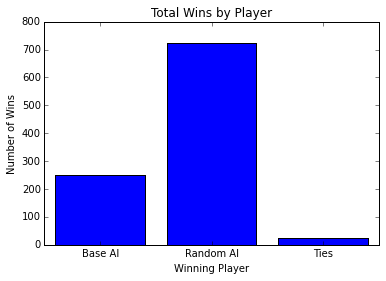

In [112]:
plt.bar(range(len(trial_results)), thousand_trials, align="center")
plt.xticks([0, 1, 2], ["Base AI", "Random AI", "Ties"])
plt.title("Total Wins by Player")
plt.xlabel("Winning Player")
plt.ylabel("Number of Wins")
plt.show()

Similar results to above. Random strategy for rolling or holding wins far more often than rolling only once, though rolling only once does occasionally win a game.